In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from math import pi
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
np.seterr(divide='ignore', invalid ='ignore')
%matplotlib inline



In [142]:
#load the data set for analysis
loanset_df = pd.read_csv('C:/Users/tummu/PGMP AI & ML/requisitefiles/loan.csv')
loanset_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [143]:
#find the loan set data
loanset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [144]:
#remove the columns having null values and find the size of the dataset sheet now
loanset_df.drop(loanset_df.iloc[:, 53:105], inplace=True,axis=1)
loanset_df.shape




(39717, 59)

In [145]:
#print columns
loanset_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim',
       'to

In [147]:
#remove the columns which are not necessary for analysis
columns_drop_removal= ["member_id","url","emp_title","home_ownership","zip_code","addr_state","delinq_2yrs","earliest_cr_line","inq_last_6mths",
                "mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec",
                "revol_bal","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries",
                "collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","mths_since_last_major_derog",
                "policy_code","application_type","pub_rec_bankruptcies"]

loanset_df.drop(labels = columns_drop_removal, axis=1, inplace=True)

loanset_df.shape

(39717, 26)

In [148]:
#check the necessary data columns
loanset_df.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'desc',
       'purpose', 'title', 'dti', 'revol_util', 'total_pymnt', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object')

In [149]:
#data cleaning--> data formatting to uniform type by stripping all the tags
loanset_df['int_rate'] = loanset_df['int_rate'].str.rstrip('%')
loanset_df['emp_length'] = loanset_df['emp_length'].str.rstrip('+ years')
loanset_df['emp_length'] = loanset_df['emp_length'].str.rstrip('< 1')
loanset_df['revol_util'] = loanset_df['revol_util'].str.rstrip('%')

In [150]:
# Convert the amount into a readable format
collectionamt=['loan_amnt','funded_amnt','int_rate','funded_amnt_inv','installment','dti','total_pymnt']
loanset_df[collectionamt]=loanset_df[collectionamt].apply(pd.to_numeric)

In [158]:
#clean the data by deleting the columns with missing data >90%
na_trash = len(loanset_df)*90/100
loanset_df = loanset_df.dropna(thresh=na_trash, axis=1)

In [160]:
#redundant data is now deleted check for reliable data size
loanset_df.shape
loanset_df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,dti,revol_util,total_pymnt,tax_liens
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,...,Verified,Dec-11,Fully Paid,n,credit_card,Computer,27.65,83.70,5863.155187,0.0
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,,...,Source Verified,Dec-11,Charged Off,n,car,bike,1.00,9.40,1008.710000,0.0
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,...,Not Verified,Dec-11,Fully Paid,n,small_business,real estate business,8.72,98.50,3005.666844,0.0
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,...,Source Verified,Dec-11,Fully Paid,n,other,personel,20.00,21,12231.890000,0.0
4,1075358,3000,3000,3000.0,60 months,12.69,67.79,B,B5,,...,Source Verified,Dec-11,Current,n,other,Personal,17.94,53.90,3513.330000,0.0


In [164]:
# Finding percentage of null or missing values

Null_percentage = round(100*(loanset_df.isnull().sum()/len(loanset_df.index)), 2)

# Printing columns which have more than 0% missing values

Null_percentage[ Null_percentage > 0 ]

loanset_df.drop(Null_percentage[ Null_percentage > 30 ].index, axis=1, inplace=True)

In [165]:
# Create year and month at the end 

loanset_df.issue_d = pd.to_datetime(loanset_df.issue_d, format='%b-%y')
loanset_df['year']=loanset_df['issue_d'].dt.year
loanset_df['month']=loanset_df['issue_d'].dt.month

loanset_df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,loan_status,pymnt_plan,purpose,title,dti,revol_util,total_pymnt,tax_liens,year,month
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,...,Fully Paid,n,credit_card,Computer,27.65,83.70,5863.155187,0.0,2011,12
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,,...,Charged Off,n,car,bike,1.00,9.40,1008.710000,0.0,2011,12
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,...,Fully Paid,n,small_business,real estate business,8.72,98.50,3005.666844,0.0,2011,12
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,...,Fully Paid,n,other,personel,20.00,21,12231.890000,0.0,2011,12
4,1075358,3000,3000,3000.0,60 months,12.69,67.79,B,B5,,...,Current,n,other,Personal,17.94,53.90,3513.330000,0.0,2011,12


In [168]:
#categorise loan amounts, income, interest rates, dti into different groups which will help in further analysis.
loanset_df['loan_amnt_cats'] = pd.cut(loanset_df['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])

loanset_df['annual_inc_cats'] = pd.cut(loanset_df['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

loanset_df['int_rate_cats'] = pd.cut(loanset_df['int_rate'], [0, 10, 12.5, 16, 20], labels=['0-10', '10-13', '12.5-16', '16 +'])

loanset_df['dti_cats'] = pd.cut(loanset_df['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '25+'])

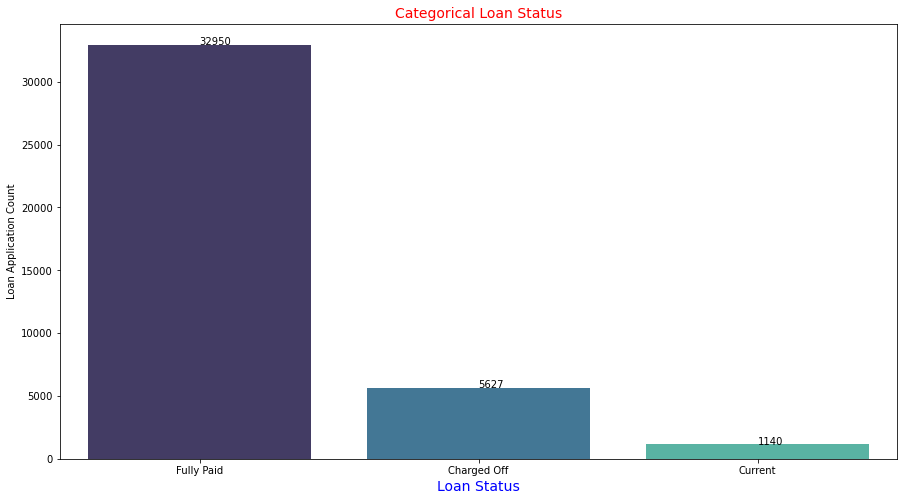

In [176]:
#univariate analysis for loan amount
(loanset_df.loan_status.value_counts()*100)/len(loan_df)

plt.figure(figsize=(15,8))

ax = sns.countplot(x="loan_status",data=loanset_df,palette='mako')
ax.set_title('Categorical Loan Status',fontsize=14, color = 'r')
ax.set_xlabel('Loan Status',fontsize=14, color='b')
ax.set_ylabel('Loan Application Count')     

# To show count of values above bars
s=loanset_df['loan_status'].value_counts()
for i, v in s.reset_index().iterrows():
    ax.text(i, v.loan_status + 0.3 , v.loan_status, color='k')

# charged off loans % - approx 14.1%

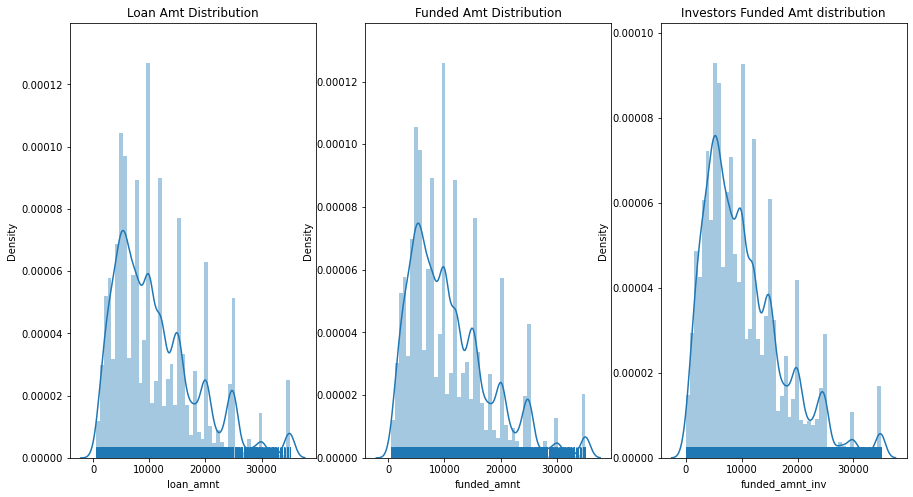

In [177]:
plt.figure(figsize=(15,8))
plt.subplot(1,3,1)
sns.distplot(a=loanset_df.loan_amnt, rug=True)
plt.title('Loan Amt Distribution')

plt.subplot(1,3,2)
sns.distplot(a=loanset_df.funded_amnt, rug=True)
plt.title('Funded Amt Distribution')

plt.subplot(1,3,3)
sns.distplot(a=loanset_df.funded_amnt_inv, rug=True)
plt.title('Investors Funded Amt distribution')
plt.show()



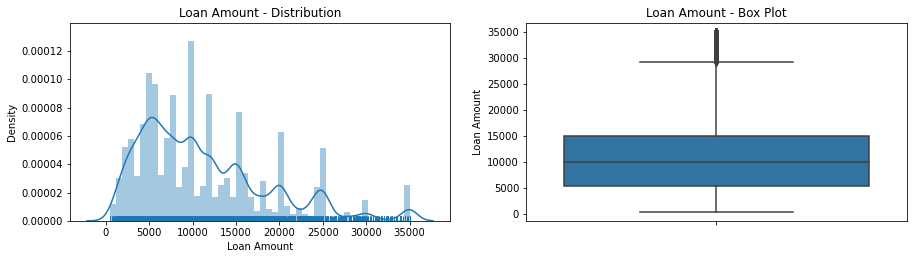

In [178]:
# considering the loan amount for further univariate analysis

plt.figure(figsize=(15,8))

plt.subplot(2, 2, 1)
ax = sns.distplot(loanset_df['loan_amnt'],rug = True)
ax.set_title('Loan Amount - Distribution')
ax.set_xlabel('Loan Amount')

plt.subplot(2, 2, 2)
ax = sns.boxplot(y=loanset_df['loan_amnt'])
ax.set_title('Loan Amount - Box Plot')
ax.set_ylabel('Loan Amount')
plt.show()

#observation - Loan amount - range 5000 to 15000.

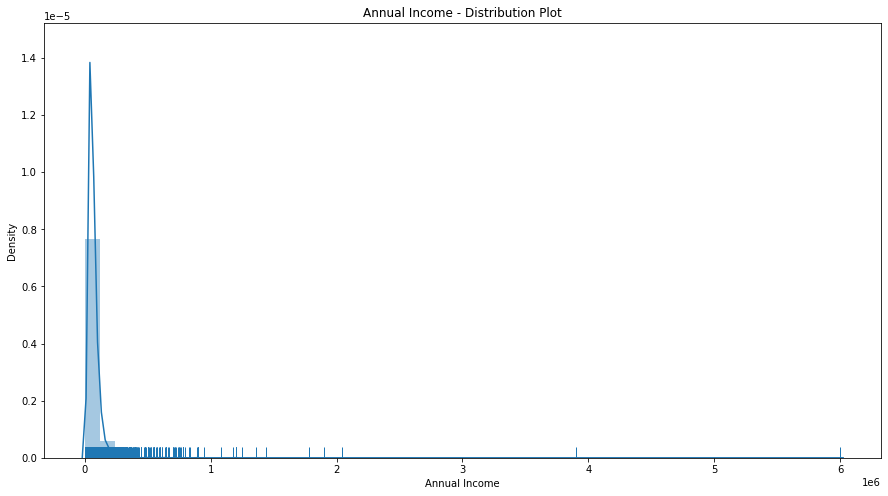

In [179]:
plt.figure(figsize=(15,8))

ax = sns.distplot(loanset_df['annual_inc'],rug = True)
ax.set_title('Annual Income - Distribution Plot')
ax.set_xlabel('Annual Income')
plt.show()


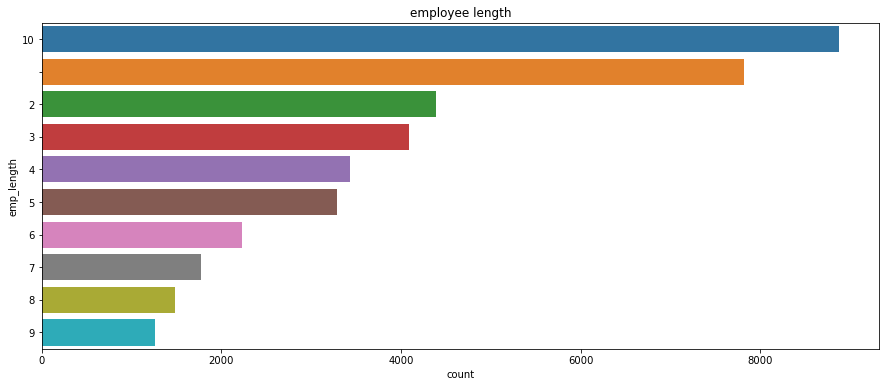

In [180]:
plt.figure(figsize=(15,6))
ax = sns.countplot(y=loanset_df['emp_length'],order = loanset_df['emp_length'].value_counts().index)
ax = plt.title('employee length')

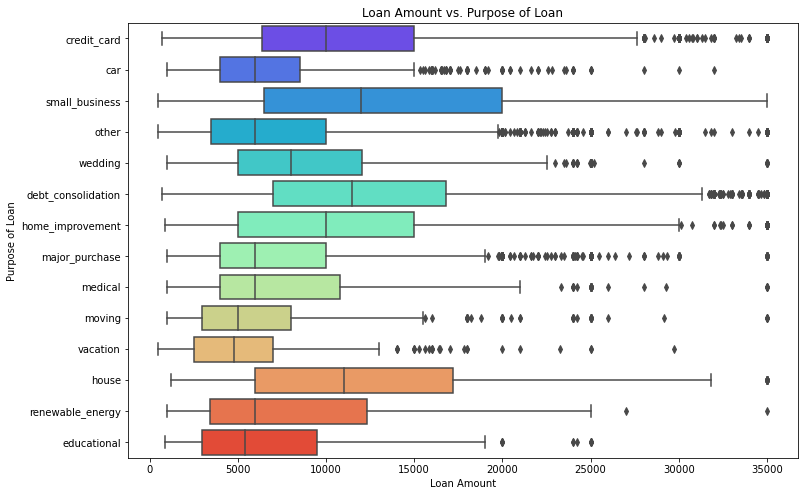

In [183]:
# bivariate analysis using the data 
# vairables list purpose of loans, loan amount, interest rate, annual income, grades,verification status
plt.figure(figsize=(12,8))
ax = sns.boxplot(y='purpose', x='loan_amnt', data =loanset_df,palette='rainbow')
ax.set_title('Loan Amount vs. Purpose of Loan')
ax.set_ylabel('Purpose of Loan')
ax.set_xlabel('Loan Amount')
plt.show()

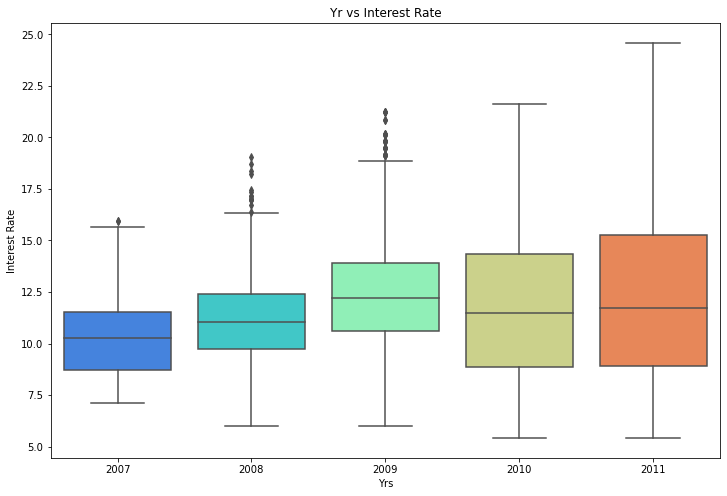

In [187]:
plt.figure(figsize=(12,8))
ax = sns.boxplot(y='int_rate', x='year', data =loanset_df,palette='rainbow')
ax.set_title('Yr vs Interest Rate')
ax.set_ylabel('Interest Rate')
ax.set_xlabel('Yrs')
plt.show()
# interest rates are increasing year by year

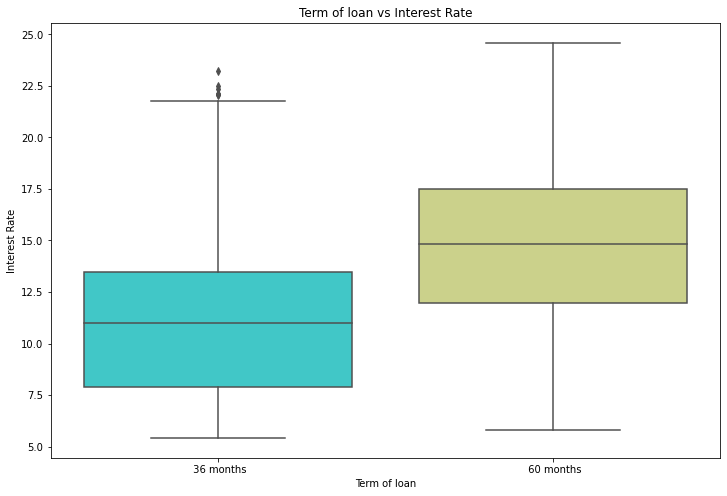

In [188]:
plt.figure(figsize=(12,8))
ax = sns.boxplot(y='int_rate', x='term', data =loanset_df,palette='rainbow')
ax.set_title('Term of loan vs Interest Rate')
ax.set_ylabel('Interest Rate')
ax.set_xlabel('Term of loan')
plt.show()

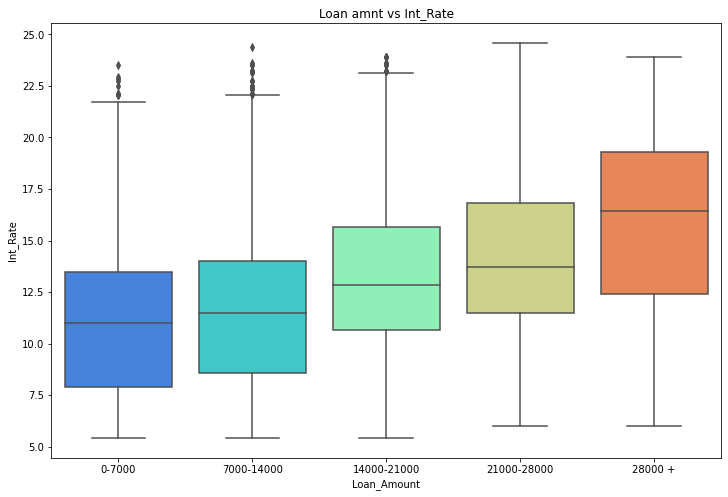

In [190]:
plt.figure(figsize=(12,8))
ax = sns.boxplot(y='int_rate', x='loan_amnt_cats', data =loanset_df,palette='rainbow')
ax.set_title('Loan amnt vs Int_Rate')
ax.set_ylabel('Int_Rate')
ax.set_xlabel('Loan_Amount')
plt.show()

In [196]:
# Bivariate Analysis on purpose of Loan against Chargedoff_Proportion.

purpose_s_loan = loanset_df.groupby(['purpose','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total'] = purpose_vs_loan['Charged Off'] + purpose_vs_loan['Current'] + purpose_vs_loan['Fully Paid'] 
purpose_vs_loan['Chargedoff_Proportion'] = purpose_vs_loan['Charged Off'] / purpose_vs_loan['Total']
purpose_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,purpose,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
11,small_business,475.0,74.0,1279.0,1828.0,0.259847
10,renewable_energy,19.0,1.0,83.0,103.0,0.184466
3,educational,56.0,0.0,269.0,325.0,0.172308
9,other,633.0,128.0,3232.0,3993.0,0.158527
8,moving,92.0,7.0,484.0,583.0,0.157804
5,house,59.0,14.0,308.0,381.0,0.154856
7,medical,106.0,12.0,575.0,693.0,0.152958
2,debt_consolidation,2767.0,586.0,15288.0,18641.0,0.148436
12,vacation,53.0,6.0,322.0,381.0,0.139108
4,home_improvement,347.0,101.0,2528.0,2976.0,0.116599


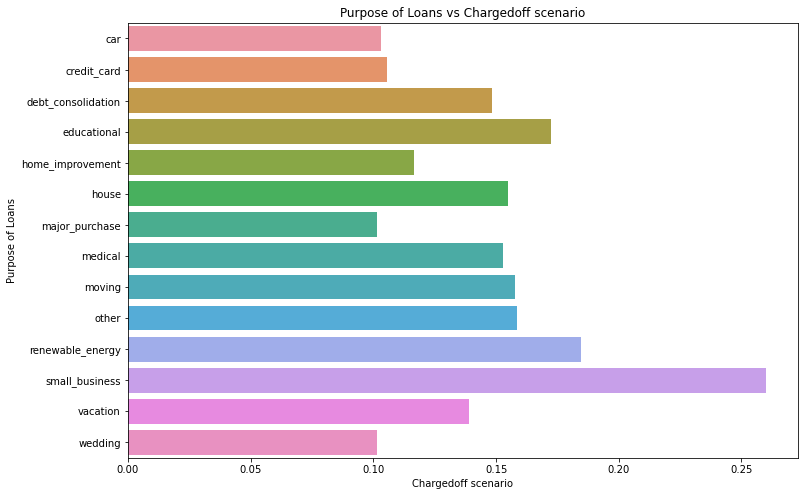

In [205]:
 # Bar plot Purpose vs charged off scenarios
ax1 = plt.subplots(figsize=(12, 8))

ax1=sns.barplot(y='purpose', x='Chargedoff_Proportion', data=purpose_vs_loan)
ax1.set_title('Purpose of Loans vs Chargedoff scenario')
ax1.set_ylabel('Purpose of Loans')
ax1.set_xlabel('Chargedoff scenario')
plt.show()

# small scale business have high charged off scenarios